# Tracy-Widom distribution

Tracy and Widom showed that the cumulative distribution function $F_2$ for the deviations of the largest eigenvalue of the GUE, suitably centred and normalized, is given by

$$F_2(x) = \exp(-I(x)),$$

where $$I(x) = \int_x^\infty (t-x) \, q(t)^2 dt,$$

so that $I''(x) = q(x)^2$, where $q(t)$ satisfies

$$\ddot{q}(t) = t \, q(t) + 2 q(t)^3.$$

## Analytics: numerical solution of the differential equation

We can convert this into the following system of ordinary differential equations:

$$
\frac{d}{dt}
\begin{pmatrix}
    q \\ q' \\ I \\ I'
\end{pmatrix}
=
\begin{pmatrix}
q' \\ t \, q + 2q^3 \\ I' \\ q^2
\end{pmatrix},
$$

with the boundary condition $q(t) \sim \mathrm{Ai}(t)$ as $t \to \infty$, where $\mathrm{Ai}(t)$ is the Airy function. Numerically, we impose this boundary condition at a "sufficiently large" $t_0$ on both $q(t_0)$ and $q'(t_0)$. We will denote $\mathbf{x} = (q, q', I, I')$. 

We can solve this in Julia using the `ode45` adaptive Runge-Kutta method, provided by the `ODE.jl` package; the following is based on the MATLAB version in Alan Edelman's book. 

In [1]:
using ODE   # Julia package for solving ODEs

In [2]:
t0 = 5.0
t_final = -6.0

-6.0

In [3]:
xx0 = [airy(t0), airy(1, t0), 0, airy(t0)^2];

In [4]:
function Tracy_Widom(t, xx)      # xx is a vector
    q, q′, I, I′ = xx            # Extract its components;  "′" is written \prime<TAB>
    
    [q′, t*q + 2q^3, I′, q^2]    # return this vector
end

Tracy_Widom (generic function with 1 method)

In [5]:
t, xx = ode45(Tracy_Widom, xx0, [t0, t_final], maxstep=0.01) ;   

In [6]:
# Convert xx to a matrix and extract components:

xx = hcat(xx...)'
II = xx[:, 3]   # 3rd column
II′ = xx[:, 4];

We can now plot the PDF, given by $p(x) = F_2'(x) = -I'(x) \exp(-I(x))$:

In [7]:
using PyPlot

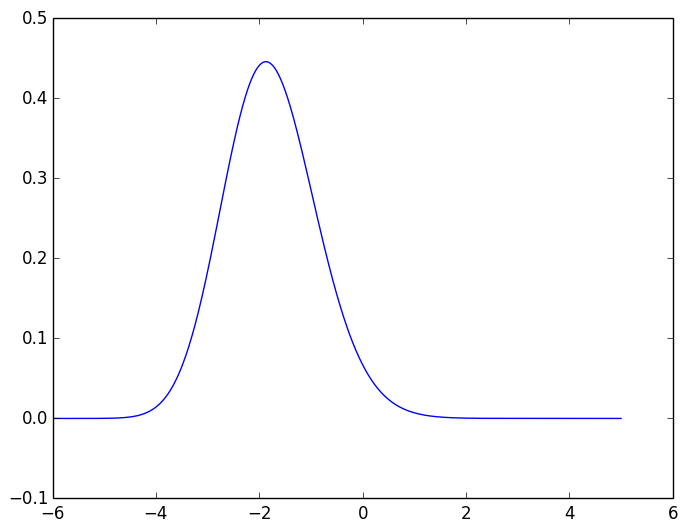

In [8]:
pdf = -II′ .* exp(-II)
plot(t, pdf);

## Numerics: Monte Carlo

In [9]:
function maximum_evals(n, num_iterations)
    evals = Float64[]

    for i in 1:num_iterations
        M = randn(n, n) + im*randn(n, n)
        S = (M + M') / 2
        push!(evals, maximum(eigvals(S)))
    end
    
    evals = n^(1//6) * (evals - 2*√n)

end

maximum_evals (generic function with 1 method)

In [10]:
v = @time maximum_evals(100, 10000);

 88

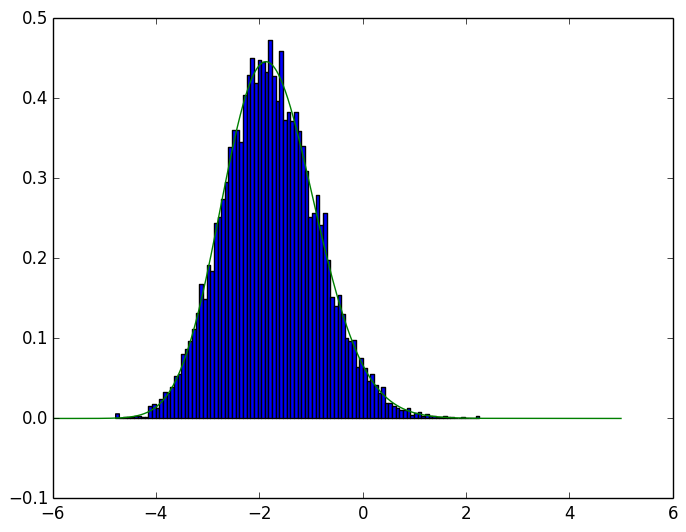

In [15]:
plt[:hist](v, 100, normed=true)
plot(t, pdf);

A much better (=faster) numerical method is available by using the tridiagonal model, instead of this dense matrix model.